# From Scratch to Smart: CNNs and Transfer Learning for Image Classification


## Main Goals of the Project

### 1. Build a CNN from Scratch
- **Design and train** a custom Convolutional Neural Network to classify images from the **CIFAR-10 dataset**.  
- Include **convolutional, pooling, and fully connected layers**.  
- Apply best practices such as **normalization, data augmentation, and early stopping**.  

### 2. Apply Transfer Learning
- Utilize **pre-trained models** (e.g., VGG16, ResNet, Inception) trained on **ImageNet**.  
- Adapt them to CIFAR-10 through **feature extraction and/or fine-tuning**.  
- Compare which **pre-trained architecture achieves the best performance**.  

### 3. Evaluate and Compare Approaches
- Assess model performance using **accuracy, precision, recall, and F1-score**.  
- Visualize results with a **confusion matrix**.
- Directly compare your custom CNN vs. transfer learning models, analyzing advantages and trade-offs.

### 4. Critical Analysis and Insights
- Reflect on when to use models from scratch vs. transfer learning.
- Discuss trade-offs: data requirements, training time, accuracy, generalization.
   

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

In [1]:
save_dir = "/model_checkpoint"

In [2]:
from tensorflow.keras.datasets import cifar10


# Loading and splitting dataset into training and testing
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


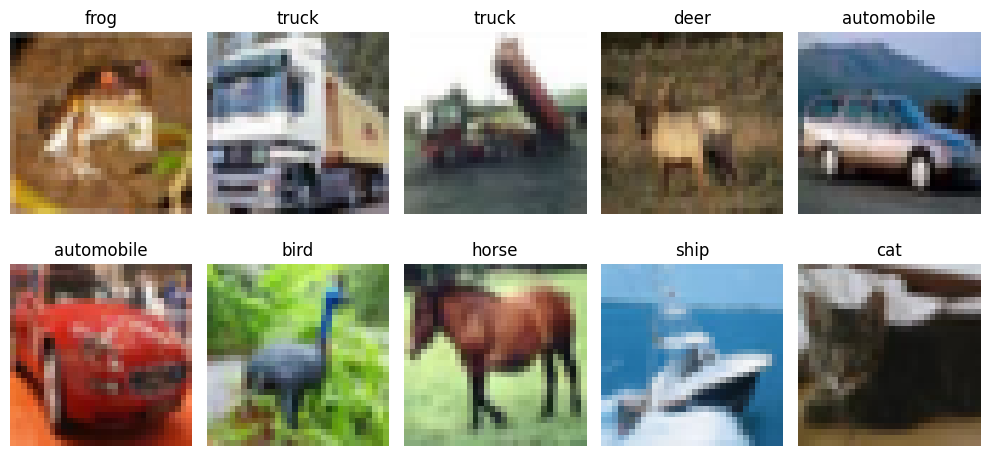

In [5]:
class_names = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i].item()])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
y_train=y_train.reshape (-1,)

In [7]:
def plot_image(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(class_names[y[index]],fontsize=15)


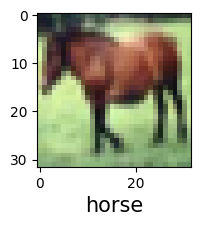

In [9]:
plot_image(X_train,y_train, 7)

In [10]:
X_train =X_train/255
X_test = X_test/255

## Building CNN

In [11]:
model1 = Sequential([
    layers.Input(shape=(32,32,3)),
    # Input shape is 32x32 pixels with 3 color channel (RGB)
    Conv2D(32, (3,3), activation='relu'),
    # Max pooling layer to reduce spatial dimensions by a factor of 2
    MaxPooling2D(2,2),
    # Second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
    Conv2D(64, (3,3), activation='relu'),
    # Another max pooling layer to reduce size further
    MaxPooling2D(2,2),
    # Flatten the 2D feature maps into a 1D vector for dense layers
    Flatten(),
    # Fully connected (dense) layer with 128 neurons and ReLU activation
    #Learns intermediate features from the previous layers
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (for 10 classes) and softmax activation
    #Produces the final probabilities for each class.
    Dense(10, activation='softmax')
    ],name="model1")

In [12]:
model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [13]:
model1.fit(X_train,y_train , epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4018 - loss: 1.6460
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6168 - loss: 1.0953
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6727 - loss: 0.9364
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7130 - loss: 0.8198
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7409 - loss: 0.7375
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7678 - loss: 0.6606
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7954 - loss: 0.5901
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8210 - loss: 0.5148
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8431 - loss: 0.4526
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8632 - loss: 0.3907


In [14]:
model1.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6933 - loss: 1.0615


[1.0617579221725464, 0.6916000247001648]

In [ ]:
model1.save("cnnmodel_serg_v1c.keras")

In [15]:
y_test = y_test.reshape(-1,)

In [16]:
y_pred = model1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
y_classes= [np.argmax(element) for  element in y_pred]

In [22]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.75      0.82      0.79      1000
           2       0.63      0.57      0.60      1000
           3       0.52      0.52      0.52      1000
           4       0.61      0.68      0.64      1000
           5       0.67      0.54      0.60      1000
           6       0.71      0.81      0.76      1000
           7       0.84      0.64      0.72      1000
           8       0.79      0.78      0.79      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [23]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8798 - loss: 0.3423 - val_accuracy: 0.8541 - val_loss: 0.4023
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9086 - loss: 0.2644 - val_accuracy: 0.8394 - val_loss: 0.4605
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9231 - loss: 0.2233 - val_accuracy: 0.8452 - val_loss: 0.4501
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9369 - loss: 0.1840 - val_accuracy: 0.8182 - val_loss: 0.5391
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9501 - loss: 0.1462 - val_accuracy: 0.8197 - val_loss: 0.6077
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9573 - loss: 0.1271 - val_accuracy: 0.8075 - val_loss: 0.6698
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9640 - loss: 0.1074 - val_accuracy: 0.7979 - val_loss: 0.7443
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9679 - loss: 0.0957 - 

In [25]:
model1.save("colab_cnnmodel_serge_v1.keras")

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict class probabilities
y_pred_probs = model1.predict(X_test)

# Convert probabilities to class predictions
y_pred = y_pred_probs.argmax(axis=1)
y_true = y_test  # original integer labels

# Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.6597
Precision: 0.6620
Recall: 0.6597
F1 Score: 0.6597


In [27]:

# Setup EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # metric to monitor
    patience=3,           # stop if no improvement after 3 epochs
    restore_best_weights=True
)
# Train the model with early stopping
history = model1.fit(
    X_train, y_train,
    epochs=60,             # large max epochs, training will stop early if needed
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test accuracy with early stopping: {accuracy:.4f}")

Epoch 1/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9922 - loss: 0.0219 - val_accuracy: 0.7618 - val_loss: 1.8218
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.7674 - val_loss: 1.7850
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 6.6041e-04 - val_accuracy: 0.7691 - val_loss: 1.8000
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 4.1158e-04 - val_accuracy: 0.7707 - val_loss: 1.8191
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 2.9939e-04 - val_accuracy: 0.7711 - val_loss: 1.8449
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6787 - loss: 3.3177
Test accuracy with early stopping: 0.6793


In [28]:
model1.save("collab_cnnmodel_serg_esv2.keras")

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
).flow(X_tr, y_tr, batch_size=64, shuffle=True, seed=42)

val_gen = ImageDataGenerator().flow(X_val, y_val, batch_size=64, shuffle=False)

history = model1.fit(train_gen, epochs=20, validation_data=val_gen)
loss, acc = model1.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Epoch 1/20
  1/625 ━━━━━━━━━━━━━━━━━━━━ 39s 64ms/step - accuracy: 0.6406 - loss: 3.9190

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5284 - loss: 1.7415 - val_accuracy: 0.7435 - val_loss: 0.7376
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6233 - loss: 1.1030 - val_accuracy: 0.7654 - val_loss: 0.6743
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.6466 - loss: 1.0269 - val_accuracy: 0.7930 - val_loss: 0.6023
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6640 - loss: 0.9650 - val_accuracy: 0.7608 - val_loss: 0.6769
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6735 - loss: 0.9357 - val_accuracy: 0.7646 - val_loss: 0.6592
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6886 - loss: 0.8998 - val_accuracy: 0.7678 - val_loss: 0.6513
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6944 - loss: 0.8849 - val_accuracy: 0.7806 - val_loss: 0.6235
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.7032 - loss: 0.8522 - val_accurac

In [31]:
model1.save("collab_cnnmodel_serg_dav3.keras")

In [32]:
from tensorflow.keras import layers, models, regularizers

def make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5):
    return models.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(32, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 2
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Block 3
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.Conv2D(128, 3, padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(wd)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(dr/2),

        # Classifier
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(wd)),
        layers.Dropout(dr),
        layers.Dense(10, activation='softmax'),
    ])

In [33]:
# 1. Create model
model2 = make_stronger_cnn(input_shape=(32,32,3), wd=1e-4, dr=0.5)

# 2. Compile
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Train
history = model2.fit(X_train, y_train,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2)

# 4. Evaluate
loss, acc = model2.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.4f}")

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.3144 - loss: 2.1133 - val_accuracy: 0.5048 - val_loss: 1.4785
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5154 - loss: 1.4463 - val_accuracy: 0.5697 - val_loss: 1.2899
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6027 - loss: 1.2273 - val_accuracy: 0.6562 - val_loss: 1.0602
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6604 - loss: 1.0711 - val_accuracy: 0.7032 - val_loss: 0.9611
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7006 - loss: 0.9844 - val_accuracy: 0.6985 - val_loss: 1.0510
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7260 - loss: 0.9339 - val_accuracy: 0.7523 - val_loss: 0.8473
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7504 - loss: 0.8757 - val_accuracy: 0.7294 - val_loss: 0.9385
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7619 - loss: 0.8521 - val_acc

In [34]:
model2.save("colab_cnn_serge_finalv4.keras")